In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.gridspec as grdispec

In [4]:
cars = pd.read_csv('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/car_prices.csv', on_bad_lines='skip')

In [6]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [10]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


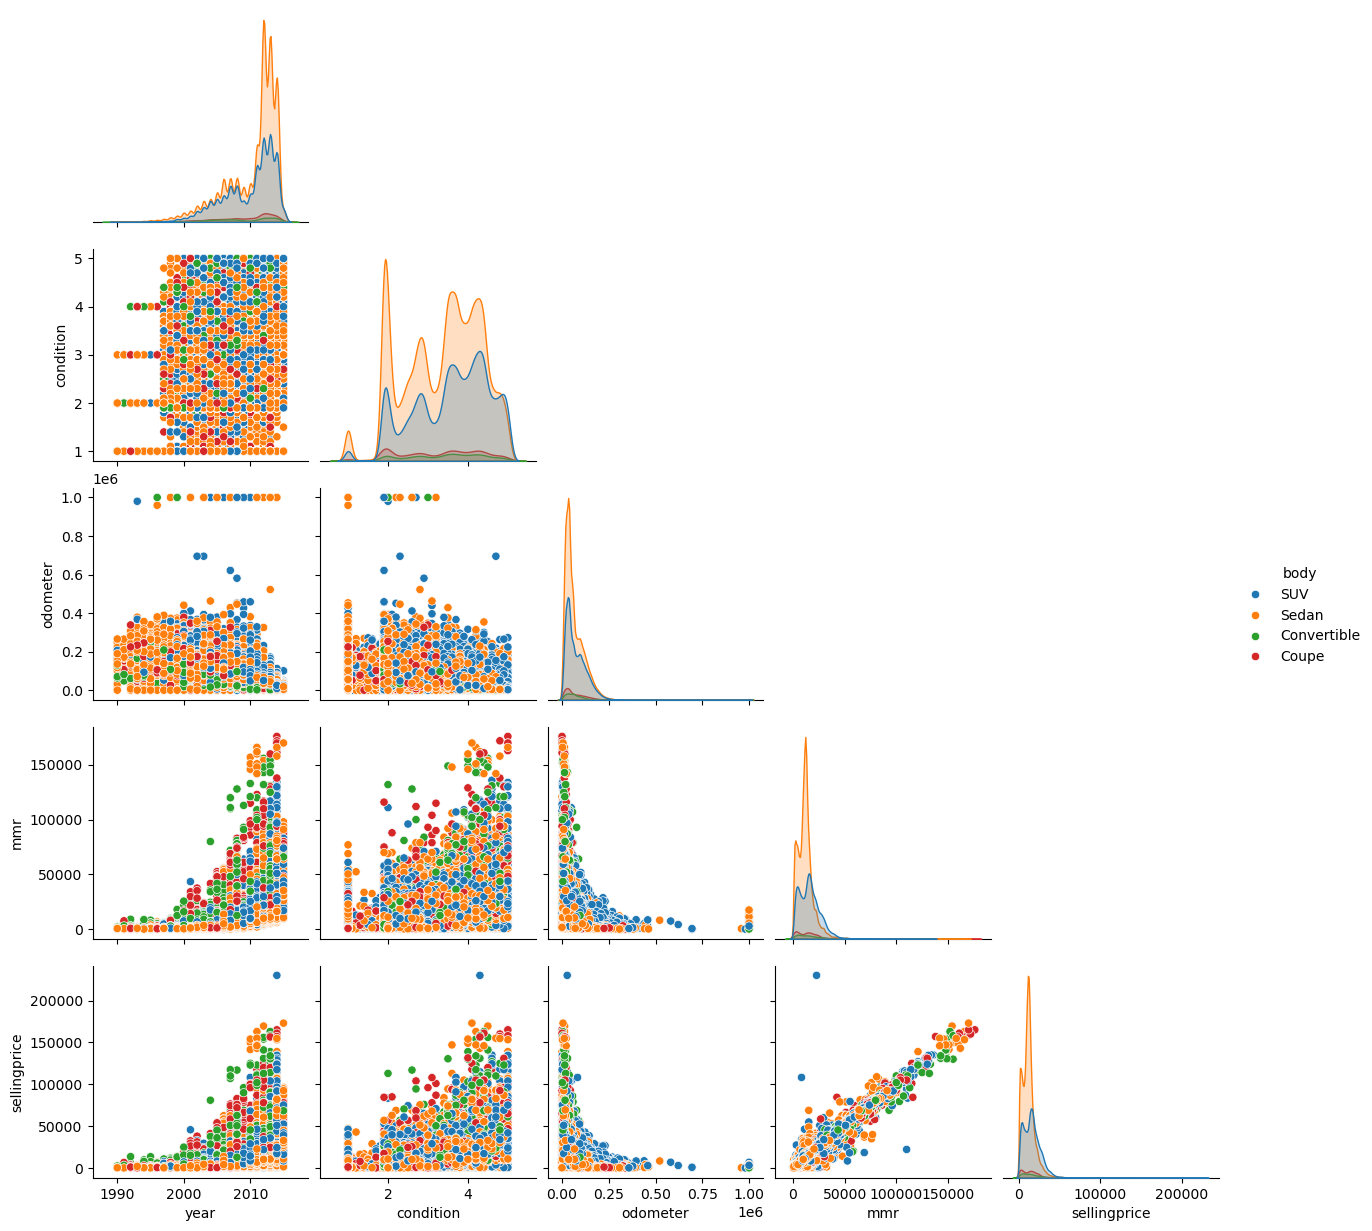

In [14]:
sns.pairplot(
    data=cars.query('body in ["SUV", "Sedan", "Convertible", "Coupe"]'),
    hue="body",
    corner=True,
    diag_kind="kde"
)

<Axes: >

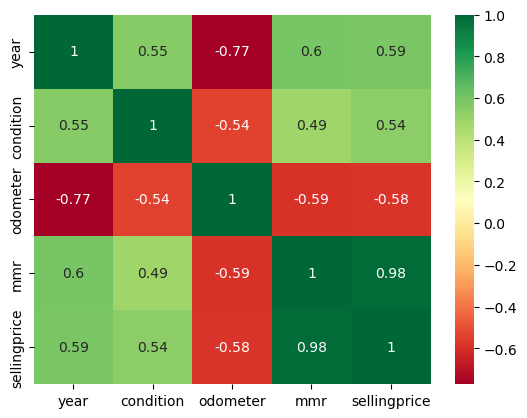

In [24]:
sns.heatmap(
    data=cars.select_dtypes(include=['number']).corr(),
    annot=True,
    #fmt="g",
    cmap="RdYlGn"
)

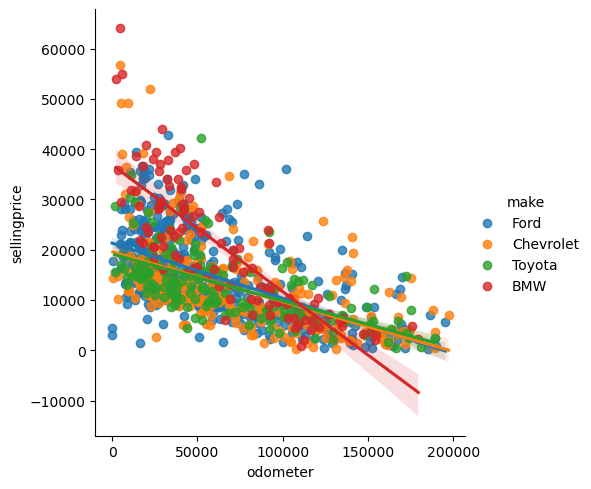

In [58]:

sns.lmplot(
    data=cars.query("make in ['Ford', 'BMW', 'Toyota', 'Chevrolet'] and sellingprice <150000 and odometer < 200000").sample(1000),
    x="odometer",
    y="sellingprice",
    hue="make",
)

/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_4285/2847698552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='condition_bins', ylabel='sellingprice'>

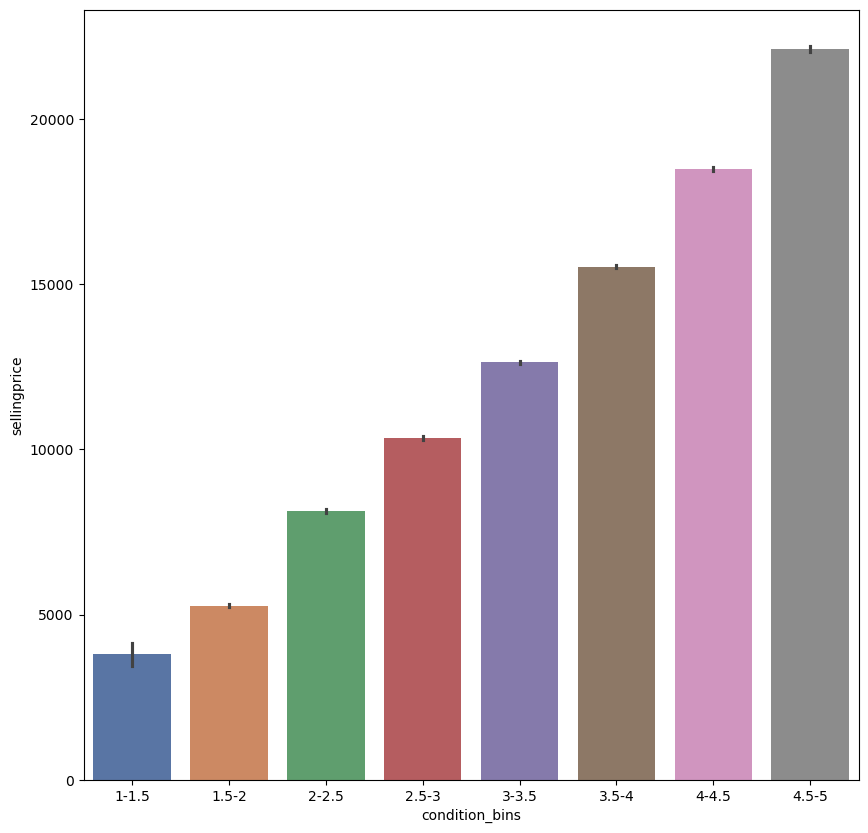

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))

bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]

cars["condition_bins"] = pd.cut(cars["condition"], bins=bins, labels=labels)

sns.barplot(
    data=cars,
    x="condition_bins",
    y="sellingprice",
    palette="deep"
)


In [93]:
cars["make"].value_counts()

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64

In [95]:
top10 = cars["make"].value_counts().iloc[:10].index

avgs = (cars
        .loc[cars["make"].isin(top10)]
        .pivot_table(index="make", 
                     columns="condition_bins", 
                     values={"sellingprice": "mean"}
                    )
        .droplevel(0, axis=1)
       )

avgs.head()

/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_4285/488385895.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index="make",


condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556


<Axes: xlabel='condition_bins', ylabel='make'>

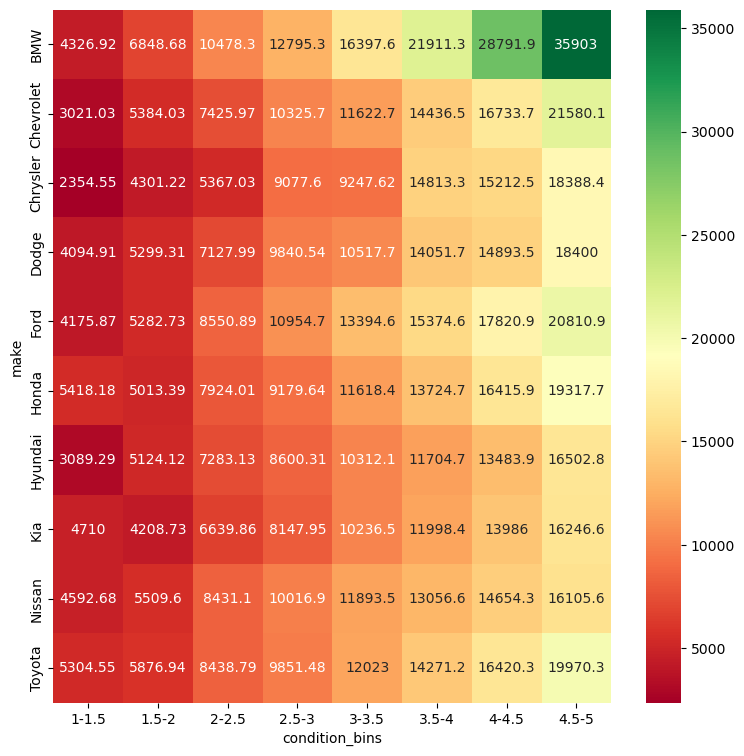

In [105]:
fig,ax=plt.subplots(figsize=(9,9))
sns.heatmap(
    data=avgs,
    annot=True,
    fmt="g",
    cmap="RdYlGn"
)

In [107]:
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5


<Axes: xlabel='sellingprice', ylabel='Count'>

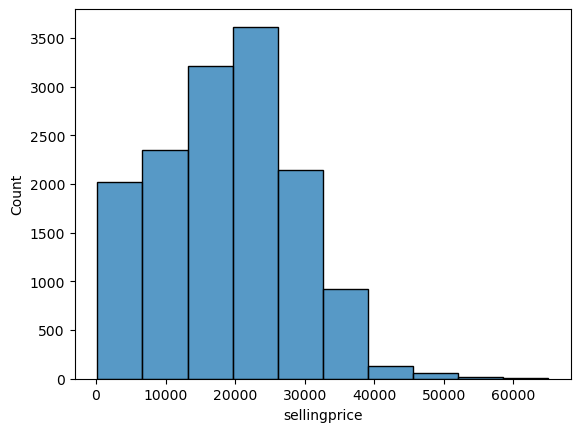

In [109]:
sns.histplot(
    data=f150s,
    x="sellingprice",
    stat="count",
    bins=10
)

/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_4285/2992529483.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'XLT'),
  Text(1, 0, 'FX2'),
  Text(2, 0, 'Lariat'),
  Text(3, 0, 'XL'),
  Text(4, 0, 'FX4'),
  Text(5, 0, 'STX'),
  Text(6, 0, 'Harley-Davidson'),
  Text(7, 0, 'King Ranch'),
  Text(8, 0, 'Limited'),
  Text(9, 0, 'Lariat Limited'),
  Text(10, 0, 'Platinum'),
  Text(11, 0, 'SVT Raptor'),
  Text(12, 0, '60th Anniversary'),
  Text(13, 0, 'SVT Lightning'),
  Text(14, 0, 'Work'),
  Text(15, 0, 'Base')])

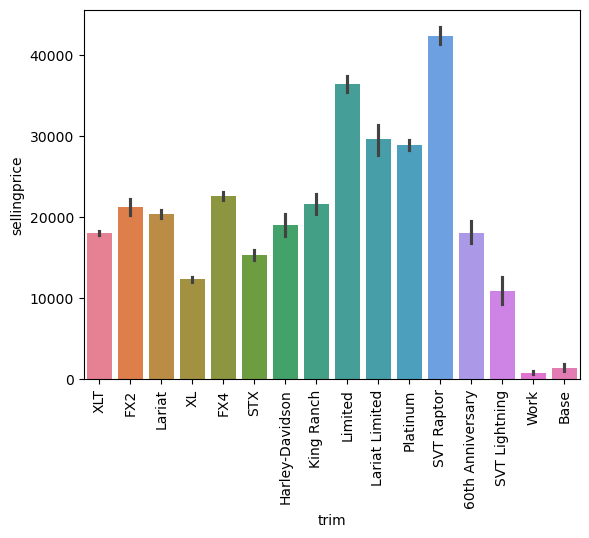

In [119]:
sns.barplot(
    data=f150s,
    x="trim",
    y="sellingprice",
    palette="husl"
)

plt.xticks(rotation=90)

In [121]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

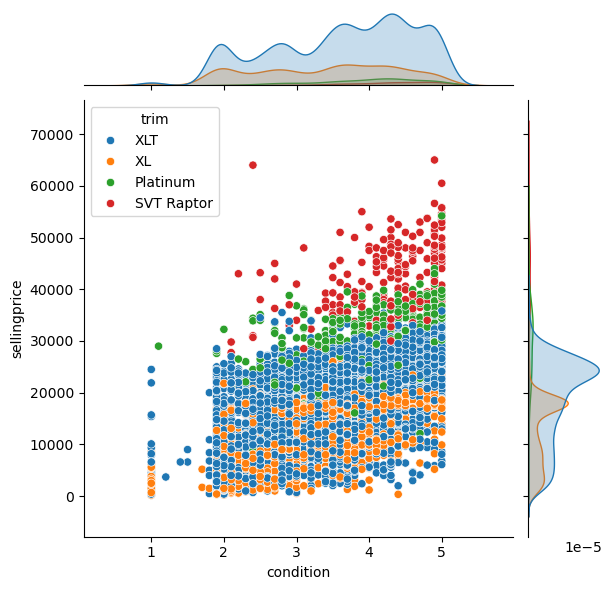

In [129]:
sns.jointplot(
    data=f150s.query("trim in @trim_list"),
    x="condition",
    y="sellingprice",
    hue="trim"
    # kind="kde"
)

In [131]:
f150s = f150s.assign(diff_to_mmr = f150s["sellingprice"] - f150s["mmr"])

In [133]:
f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins,diff_to_mmr
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,500
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,3800
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4,2500
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5,600
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5,-700


In [143]:
sns.set_style('darkgrid')

/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_4285/4263687998.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_4285/4263687998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'gray'),
  Text(1, 0, 'black'),
  Text(2, 0, 'white'),
  Text(3, 0, 'red'),
  Text(4, 0, 'silver'),
  Text(5, 0, 'blue'),
  Text(6, 0, 'brown'),
  Text(7, 0, 'gold'),
  Text(8, 0, 'burgundy'),
  Text(9, 0, 'orange'),
  Text(10, 0, 'green'),
  Text(11, 0, 'beige'),
  Text(12, 0, '—'),
  Text(13, 0, 'purple'),
  Text(14, 0, 'off-white'),
  Text(15, 0, 'yellow'),
  Text(16, 0, 'charcoal'),
  Text(17, 0, 'turquoise')])

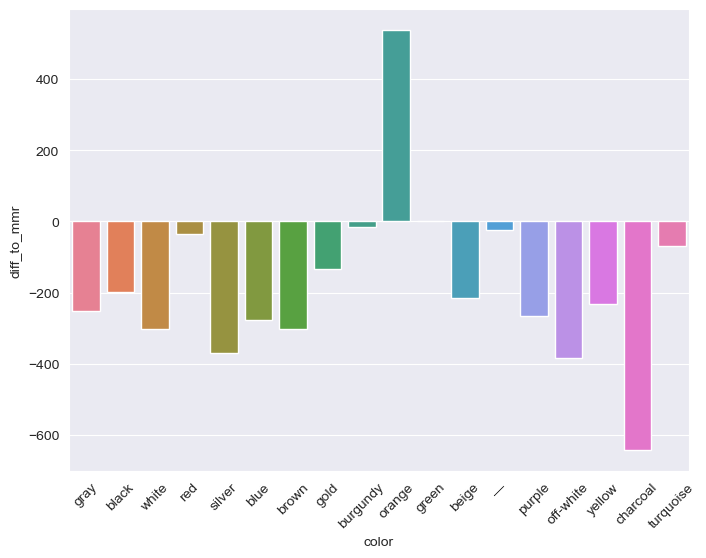

In [167]:
fig,ax=plt.subplots(figsize=(8,6))

sns.barplot(
    data=f150s,
    x="color",
    y="diff_to_mmr",
    palette="husl",
    ci=None
)
plt.xticks(rotation=45)

In [169]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

f150s_reduced = f150s.query("color != 'orange' and trim in @trim_list")

f150s_pivot = (
    f150s_reduced
    .loc[f150s_reduced["year"].between(2009, 2014)]
    .pivot_table(
        index="trim",
        columns="condition_bins",
        values={"sellingprice": "mean"}
    )
)

/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_4285/4030447675.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


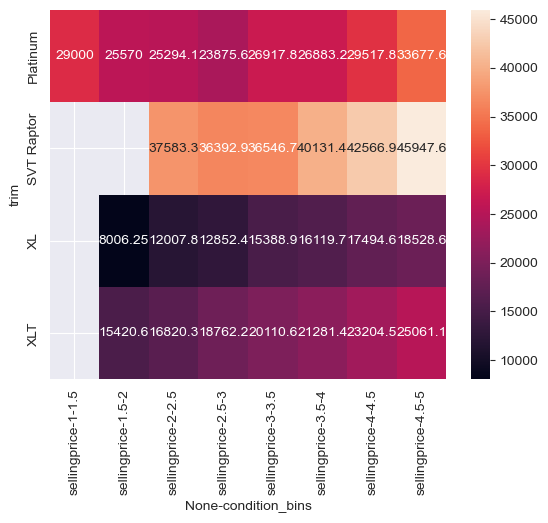

In [185]:
sns.heatmap(
    data=f150s_pivot,
    annot=True,
    fmt="g"
)

sns.set(rc={'figure.figsize':(8,6)})

In [187]:
f150s_XLT = (f150s_reduced
             .query("trim == 'XLT' and condition >= 3.5")
             .groupby(['state'], as_index=False)
             .agg(
                 mean_diff=("diff_to_mmr", 'mean'),
                 auto_count=("diff_to_mmr", "count")
             )
)


In [189]:
f150s_XLT.head()

,state,mean_diff,auto_count
0,ab,-3249.545455,55
1,al,-5900.000000,1
2,az,-539.705882,17
3,ca,1023.768473,203
4,co,497.222222,108


/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_4285/2065962680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/ht/lcgnytjx5js3222vs1k678s80000gn/T/ipykernel_4285/2065962680.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='state', ylabel='auto_count'>

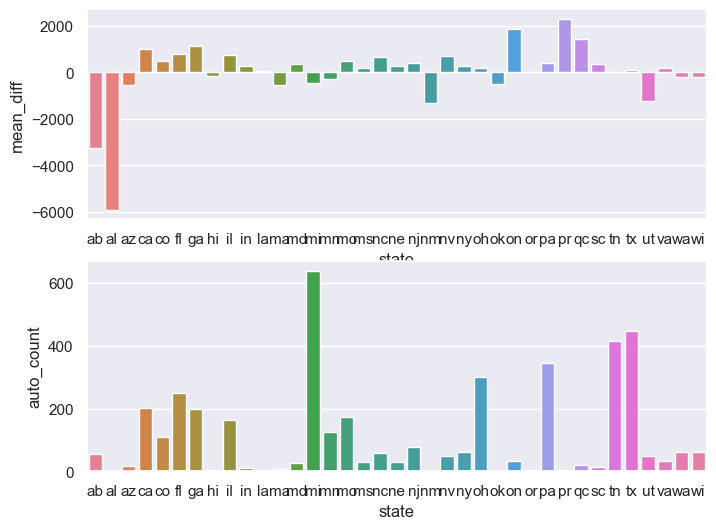

In [197]:
fig,ax = plt.subplots(2,1,figsize=(8,6))

sns.barplot(
    data=f150s_XLT,
    x="state",
    y="mean_diff",
    ax=ax[0],
    palette="husl"
)

sns.barplot(
    data=f150s_XLT,
    x="state",
    y="auto_count",
    ax=ax[1],
    palette="husl"
)